In [20]:
# 导入依赖函数库

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [21]:
# 数据集的目录位置

train_dir = "dataset/train"
valid_dir = "dataset/validation"
test_dir = "dataset/test"

# 总分类数
num_classes = 10

In [22]:
# 构造图片数据生成器方法，包括数据增强

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,    # [0,255] => [0,1]
    shear_range=0.2, #修剪
    zoom_range=0.2, #缩放
    horizontal_flip=True #翻转
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [23]:
#构造图片数据生成器

train_generator = train_datagen.flow_from_directory(
    train_dir, #图片目录
    target_size=(224, 224), #转换图片大小
    batch_size=32, #训练中每个mini-batch大小
    class_mode="categorical" #分类问题，不同目录代表不同的分类
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 837 images belonging to 10 classes.
Found 99 images belonging to 10 classes.
Found 97 images belonging to 10 classes.


In [24]:
# 定义模型 -- 卷积神经网络

import tensorflow as tf  # tensorflow

tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=[224,224,3]),   #卷积层1， 用5x5卷积核，relu激活函数, feature map: 6 input 224x224x3 output: 220x220x6
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 110x110x6
  tf.keras.layers.Conv2D(16, (5,5), activation='relu'), #卷积层2， 用5x5卷积核，relu激活函数, feature map: 16 input 110x110x6 output: 106x106x16
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 53x53x16
  tf.keras.layers.Conv2D(32, (5,5), activation='relu'),  #卷积层3， 用5x5卷积核，relu激活函数, feature map: 32 input 53x53x16 output: 49x49x32
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),  #池化2x2  output: 24x24x32
  tf.keras.layers.Conv2D(32, (5,5), activation='relu'),  #卷积层4， 用5x5卷积核，relu激活函数, feature map: 32 input 24x24x32 output: 20x20x32
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)), #池化2x2  output: 10x10x32
  tf.keras.layers.Flatten(input_shape=[10,10,32]),
  tf.keras.layers.Dense(128, activation="relu"), #128的全连接网络
  tf.keras.layers.Dense(128, activation="relu"), #128的全连接网络
  tf.keras.layers.Dense(10, activation="softmax") #10分类概率分布
])

In [25]:
# 定义模型的损失函数， 优化算法（如何调整参数以降低损失），评价指标：准确率
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 49, 49, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)      

In [27]:
# 训练过程： steps = 总图片数 / batch_size，使用默认learning_rate: 0.001, epoch：训练轮次

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30
)

Epoch 1/30


2023-09-07 00:51:58.922000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 8/26 [========>.....................] - ETA: 29s - loss: 2.3625 - accuracy: 0.1016

/home/zhfall/miniconda3/envs/tf/lib/python3.11/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - ETA: 0s - loss: 2.2286 - accuracy: 0.1689

2023-09-07 00:52:38.308704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


26/26 [==============================] - 45s 2s/step - loss: 2.2286 - accuracy: 0.1689 - val_loss: 1.8115 - val_accuracy: 0.3125
Epoch 2/30
26/26 [==============================] - 41s 2s/step - loss: 1.8896 - accuracy: 0.2919 - val_loss: 1.6310 - val_accuracy: 0.3333
Epoch 3/30
26/26 [==============================] - 40s 2s/step - loss: 1.6331 - accuracy: 0.4261 - val_loss: 1.3154 - val_accuracy: 0.5104
Epoch 4/30
26/26 [==============================] - 41s 2s/step - loss: 1.4967 - accuracy: 0.4683 - val_loss: 1.1484 - val_accuracy: 0.6354
Epoch 5/30
26/26 [==============================] - 41s 2s/step - loss: 1.3810 - accuracy: 0.5056 - val_loss: 1.0183 - val_accuracy: 0.7083
Epoch 6/30
26/26 [==============================] - 43s 2s/step - loss: 1.2422 - accuracy: 0.5517 - val_loss: 0.9029 - val_accuracy: 0.7188
Epoch 7/30
26/26 [==============================] - 40s 2s/step - loss: 1.1522 - accuracy: 0.5963 - val_loss: 0.8243 - val_accuracy: 0.8229
Epoch 8/30
26/26 [=============

In [28]:
# 显示每轮的指标

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,2.228642,0.168944,1.811487,0.312500
1,1.889587,0.291925,1.631037,0.333333
2,1.633120,0.426087,1.315410,0.510417
3,1.496693,0.468323,1.148371,0.635417
4,1.380979,0.505590,1.018298,0.708333
5,1.242223,0.551683,0.902853,0.718750
6,1.152207,0.596273,0.824261,0.822917
7,1.107199,0.607453,0.867759,0.708333
8,1.108483,0.602484,0.644130,0.822917
9,0.932133,0.685714,0.589518,0.822917


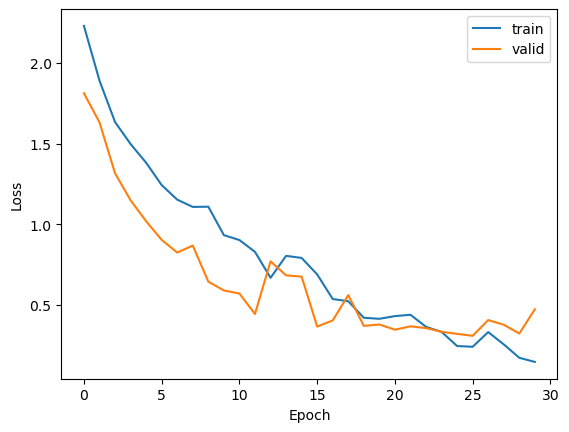

In [29]:
# 画出损失图，x轴：epoch, y轴：损失

import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

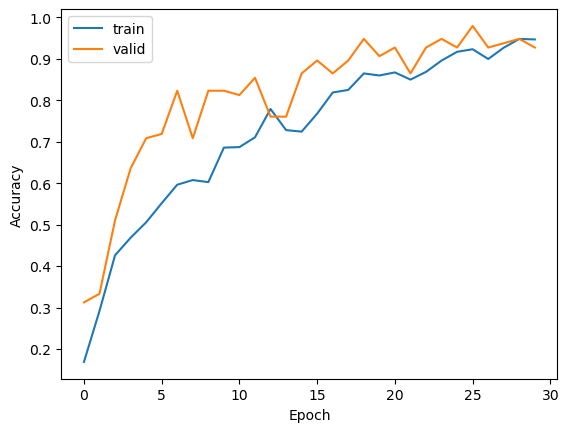

In [30]:
# 画出准确率曲线图，x轴：epoch, y轴：损失

plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [31]:
# 用测试集进行预测，结果是10类每一类的概率值

preds = model.predict(test_generator)

2023-09-07 01:13:51.489596: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 4s 1s/step


In [32]:
# 取概率最大的类别为分类结果

y_pred = np.argmax(preds, axis=1)

In [33]:
# 打印出类别表

for k, v in test_generator.class_indices.items():
    print(v, ":", k)

0 : apple
1 : banana
2 : grapes
3 : kiwi
4 : mango
5 : orange
6 : pear
7 : pineapple
8 : pomegranate
9 : watermelon


In [34]:
# 定义类别编号和名称转换字典

pred_classes = {
    0 : "apple",
    1 : "banana",
    2 : "grapes",
    3 : "kiwi",
    4 : "mango",
    5 : "orange",
    6 : "pear",
    7 : "pineapple",
    8 : "pomegranate",
    9 : "watermelon"
}

In [35]:
# 给出预测结果的类别 

y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [36]:
# 给出预测结果的类别 

y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [37]:
# 基于预测结果，和对应的分类标签，给出分类结果评估

from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       apple       0.60      1.00      0.75         6
      banana       0.78      1.00      0.88         7
      grapes       1.00      1.00      1.00        10
        kiwi       1.00      0.91      0.95        11
       mango       1.00      1.00      1.00        10
      orange       1.00      0.91      0.95        11
        pear       1.00      0.91      0.95        11
   pineapple       0.90      0.82      0.86        11
 pomegranate       1.00      0.91      0.95        11
  watermelon       1.00      0.91      0.95        11

    accuracy                           0.93        99
   macro avg       0.93      0.94      0.92        99
weighted avg       0.95      0.93      0.93        99



In [38]:
# 存储模型

model.save("cnn.h5")